## learning-AI : deep learning application (61357002)
### assignment : abalone classification (DL)

**전복 데이터를 순환 데이터로 만들어 CNN, LSTM 방식의 classification**

<br>

- **임규연 (lky473736)**
- 2024.09.22. ~ 2024.09.23.에 문서 작성
- **dataset** : https://archive.ics.uci.edu/dataset/1/abalone
- **data abstract** : Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.  Further information, such as weather patterns and location (hence food availability) may be required to solve the problem. From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200)

-----

## <span id='dl'><mark>DL</mark></span>
    
deep learning으로 abalone을 classification한다. 목차는 아래와 같다.

- **1. 간단한 탐색적 데이터 분석 및 데이터 전처리 수행, 순환 데이터로 구성**
- **2. CNN-DNN**
- **3. LSTM-DNN**
- **4. CNN-LSTM convergence**

In [216]:
# 라이브러리 import

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

------

### 1. 간단한 탐색적 데이터 분석 및 데이터 전처리 수행, 순환 데이터로 구성
- 데이터 시각화 및 필요한 정보를 얻어낸다.
- 결측치 제거, outlier 제거 등의 데이터 전처리를 수행한다.

In [217]:
# 데이터 읽기

df = pd.read_csv("../../data/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [218]:
# df의 행의 갯수, 열의 갯수, feature 파악

df.shape, df.columns

((4177, 10),
 Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
        'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
       dtype='object'))

In [219]:
# 결측치 확인

df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [220]:
# 결측치 제거

df = df.dropna()
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [221]:
# df의 기본적인 정보 및 기초통계량

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,2088.000000,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,1205.940366,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1044.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,2088.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,3132.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,4176.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


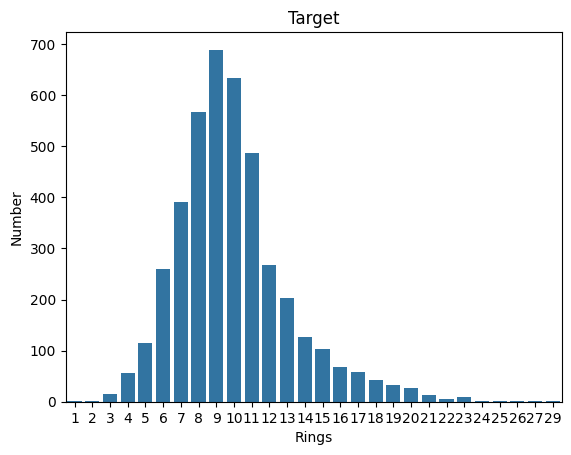

In [222]:
# seaborn countplot을 통한 각 레이블 도수 확인

sns.countplot (data=df, x='Rings')
plt.xlabel ("Rings")
plt.ylabel ("Number")
plt.title ("Target")
plt.show()

In [223]:
# target의 class 도수를 확인 (숫자로)

df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [224]:
# Sex 열을 label encoding

'''
    male : 0
    female : 1
    i (암숫컷) : 2
'''

print (set(df['Sex']))

for idx in range (df.shape[0]) : 
    compo = df.at[idx, 'Sex']
    
    if compo == 'M' : 
        df.at[idx, 'Sex'] = 0
        
    elif compo == 'F' :
        df.at[idx, 'Sex'] = 1
        
    else :
        df.at[idx, 'Sex'] = 2
         
print (set(df['Sex']))

{'F', 'I', 'M'}
{0, 1, 2}


In [225]:
# 특정 component가 0인 값이 있다면 제거해주기

print (df[df == 0].count()) # height 열 중에서 2개가 0임
df = df[df['Height'] != 0]
print (df[df == 0].count())

id                   1
Sex               1528
Length               0
Diameter             0
Height               2
Whole_weight         0
Shucked_weight       0
Viscera_weight       0
Shell_weight         0
Rings                0
dtype: int64
id                   1
Sex               1528
Length               0
Diameter             0
Height               0
Whole_weight         0
Shucked_weight       0
Viscera_weight       0
Shell_weight         0
Rings                0
dtype: int64


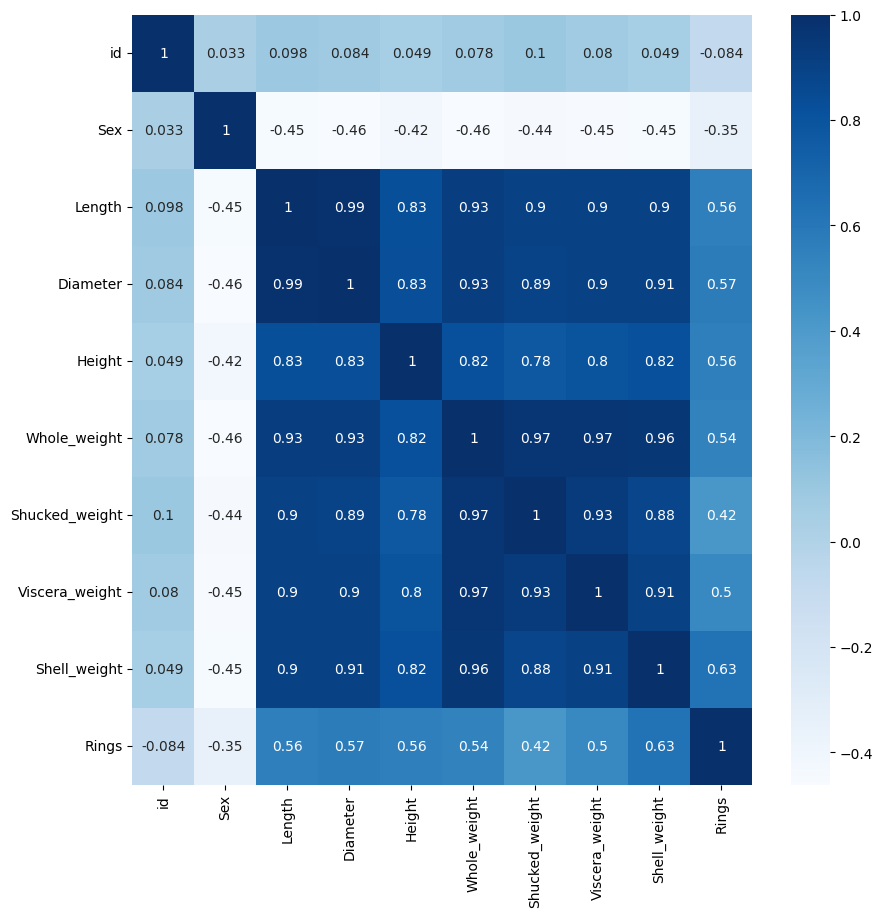

In [226]:
# heatmap 그리기

plt.figure(figsize=(10, 10))

df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cbar=True,
           cmap='Blues', annot_kws={"size": 10})
plt.show()

위를 확인하였을 때, **id, Sex 열은 Rings 열과 매우 작은 상관관계성을 가지기 때문에 제거해야 한다.** 또한 아래와 같은 결과를 알 수 있다.


- **높은 상관관계**
     - **Length와 Diameter (0.99)**
        - 매우 높은 양의 상관관계, Length와 Diameter는 거의 일치

    - **Length와 Whole weight (0.93)**, **Diameter와 Whole weight (0.93)**:
        - 길이와 직경, 무게가 매우 높은 상관관계, 이를 통하여 길이랑 직경이 크면 무게도 무겁다는 것을 예측 가능

    - **Whole weight와 Shucked weight (0.97)**, **Whole weight와 Viscera weight (0.97)**:
        - 전복의 전체 무게는 껍질을 벗긴 무게와 내장 무게와 매우 높은 상관관계를 가지므로, 전체 무게가 부분 무게들에 의해 크게 좌우되는 것을 예측 가능

    - **Shucked weight와 Viscera weight (0.93)**:
        - 두 무게가 함께 증가하거나 감소하는 경향 있음

    - **Length와 Shell weight (0.9)**, **Diameter와 Shell weight (0.91)**:
        - 전복의 길이와 직경은 껍질 무게와도 높은 상관관계 보임

- **낮은 상관관계**  
    - **Sex와 다른 변수들**
        - 성별은 다른 연속형 변수들과 음의 상관관계를 가지며, 특히 높이는 -0.42, 껍질 무게는 -0.45로 나타남, 이는 성별이 전복의 다른 물리적 특성과 직접적으로 큰 관련이 없음을 나타냄
    - **Rings와 Shucked_weight**
        - 0.42로 target값과 적은 상관관계를 가지고 있음
   

- **Reference**
    - https://github.com/huiminren/AbalonesAgeClassification/blob/master/AbalonesAgeClassification.ipynb
    
이전에 target의 클래스들의 도수를 나타내었는데, **클래스가 너무 많고 0-based로 mapping 되어있지 않다. (0부터 시작하지 않으면서, 불연속되어 있음)** label encoder로 0-based encoding, 모든 class를 소수 class를 기준으로 SMOTE를 통하여 oversampling을 진행할 수는 있는데, **그 방법보다는 오름차순으로 도수를 정렬하고 몇 개의 덩어리로 나누어서 처리**하면 될 것 같다. 마침 나와 동일한 생각을 가진 개발자가 이미 Rings, 즉 target의 클래스를 도수로 정렬하여 세 덩어리인 young, medium, old로 새로 재구성한 것을 위 reference에서 확인 가능하다.

In [227]:
# Sex, id 특성 제거 및 Rings의 재구성

print (df.columns)
df = df.drop(columns=['Sex']) # Sex 특성 제거
df = df.drop(columns=['id']) # id 특성 제거

# for ix in df.index :
#     row = df.loc[ix]
#     if row.Rings <= 7 :
#         df.loc[ix, 'Rings'] = 0 # 'young'
#     elif row.Rings >= 11 :
#         df.loc[ix, 'Rings'] = 2 # 'old'
#     elif row.Rings >= 8 and row.Rings <= 10 :
#         df.loc[ix, 'Rings'] = 1 # 'medium'

# 반복문을 사용하여 각 행의 'Rings' 값을 범주형 값으로 변환
for idx, row in df.iterrows() : 
    if row['Rings'] <= 8 :
        df.at[idx, 'Rings'] = 0 # 'young'
    elif 8 < row['Rings'] <= 11 :
        df.at[idx, 'Rings'] = 1 # 'medium'
    else :
        df.at[idx, 'Rings'] = 2 # 'old'

# 결과 확인
df.head(20)

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,2
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,2
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,1
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,2


{0: 1405, 1: 1810, 2: 960}


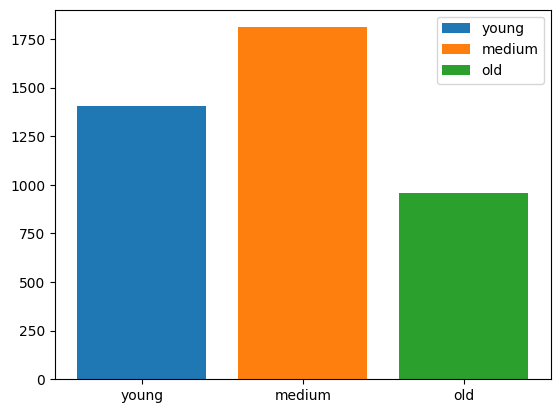

In [228]:
# 각 클래스별 갯수를 시각화

unique, counts = np.unique(df['Rings'].to_numpy(), return_counts=True)
class_counts = dict(zip(unique, counts))
print (class_counts)

plt.bar("young", class_counts[0], label="young")
plt.bar("medium", class_counts[1], label="medium")
plt.bar("old", class_counts[2], label="old")
plt.legend()
plt.show()

위 figure를 보았을 때 young, medium, old로 클래스가 구성되었으나, 각 클래스의 값이 여전히 차이가 있어 약간의 편향성을 보일 수 있다. 

- <s>**이를 해결하기 위해 SVM-SMOTE를 사용하여 oversampling을 진행**한다. SVM-SMOTE는 SVM을 사용해 소수 클래스 경계 근처의 중요한 샘플들을 식별하고, 그 주변에서 새로운 샘플을 생성하는 방식이다. 이렇게 하면 소수 클래스의 중요한 경계 데이터가 더 잘 반영되어 모델의 성능을 개선할 수 있다.</s>
- **하려고 했으나, 경계 근처에서만 샘플을 생성하기 때문에 정확한 classification이 일어나지 않는다는 점을 확인하였다. 따라서 일반적인 SMOTE를 이용하겠다.**

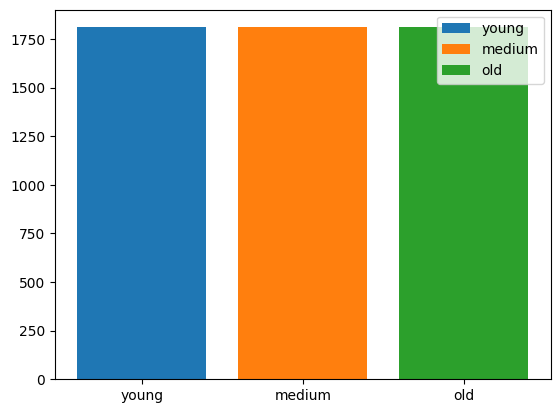

In [229]:
# abalone_input, abalone_target 만든 후 SMOTE 적용

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

abalone_input = df.drop('Rings', axis=1)
abalone_target = df['Rings']

smote = SMOTE()
abalone_input, abalone_target = smote.fit_resample(abalone_input, abalone_target)

unique, counts = np.unique(abalone_target, return_counts=True)
class_counts = dict(zip(unique, counts))

plt.bar("young", class_counts[0], label="young")
plt.bar("medium", class_counts[1], label="medium")
plt.bar("old", class_counts[2], label="old")
plt.legend()
plt.show()

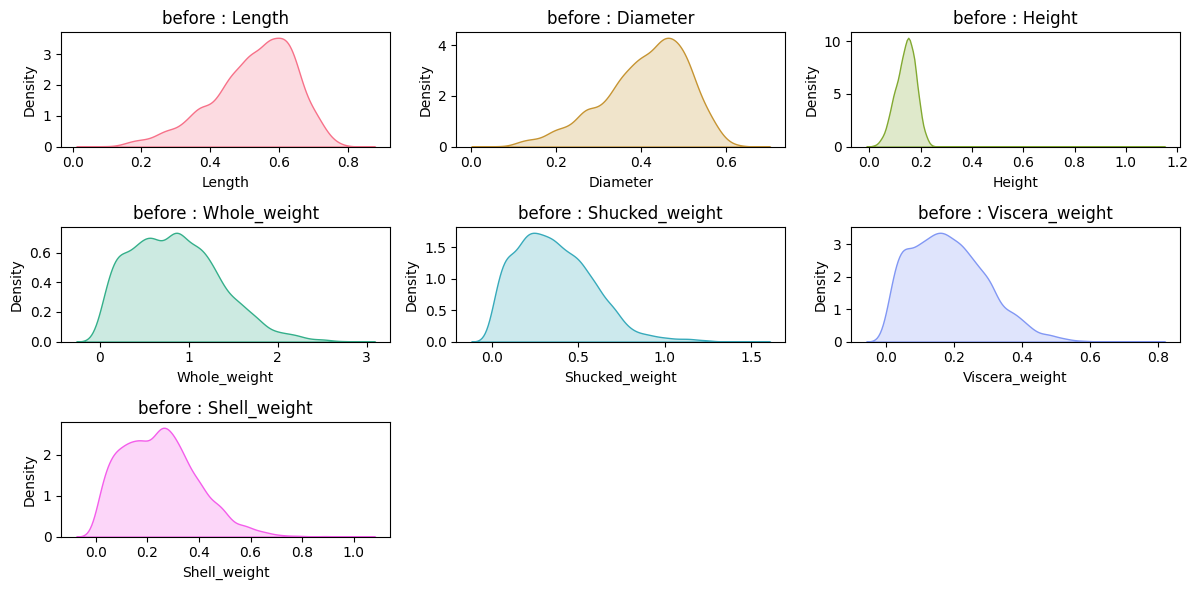

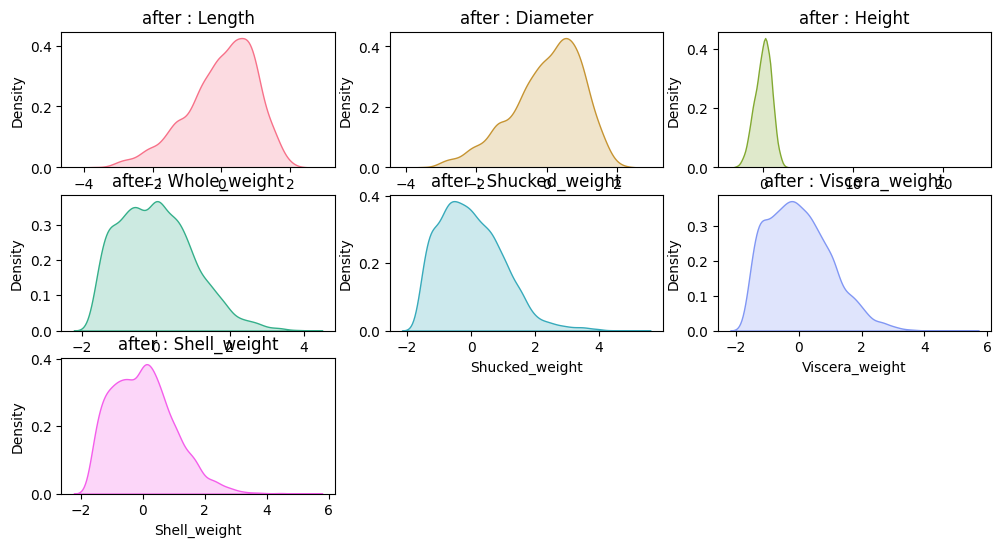

In [230]:
# z-score normalization

# 정규화 전, 각 feature마다 분포 확인하기
features = df.columns[:-1]  # 'Rings' 제외
plt.figure(figsize=(12, 6))
for i, feature in enumerate (features) :
    plt.subplot(3, 3, i+1)
    sns.kdeplot(abalone_input[feature], fill=True, color=sns.color_palette("husl", len(features))[i])
    plt.title(f'before : {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

############################################

from sklearn.preprocessing import StandardScaler

normalizier = StandardScaler()
abalone_input_scaled = pd.DataFrame(normalizier.fit_transform(abalone_input), 
                                    columns=df.columns[:-1])  # normalization

############################################

print ()

# 정규화 후
features = df.columns[:-1]  # 'Rings' 제외
plt.figure(figsize=(12, 6))
for i, feature in enumerate (features) :
    plt.subplot(3, 3, i+1)
    sns.kdeplot(abalone_input_scaled[feature], fill=True, color=sns.color_palette("husl", len(features))[i])
    plt.title(f'after : {feature}')
    plt.xlabel(feature)

- **Reference**
    - https://github.com/lky473736/learning-AI/blob/main/tool/recurrent_data/exploration_recurrent_data.ipynb
    - ```~/tool/recurrence_data``` : 순환 데이터를 만들기 위한 split_sequence의 다양한 variation 및 그에 관한 테스트 (임규연, lky473736)


본 문서에서는 순환 데이터를 대입하여 학습을 진행한다. 순환 데이터는 각 레코드를 독립적으로 학습하는 것이 아니라, 앞선 데이터를 함께 고려하여 학습하게 하는 데이터 구성인데, 예를 들어, 모델이 3번째 레코드를 학습할 때, 1번째와 2번째 레코드까지 반영하여 학습한다면, 보다 유기적인 학습이 가능해지는 것이다. 이렇게 하면 단순한 레코드 학습을 넘어서 여러 레코드를 한 번에 학습할 수 있게 되어 효율적이다.

순환 데이터를 구성 중 target의 값을 결정하는 기준은 각 문제에 따라 다르다. 크게는 아래와 같이 구분이 될 수 있다.

- ***classification 문제일 때***
    - **특정 window의 target 값 중 빈도가 가장 높은 클래스 선택**
    - **특정 window에서 마지막 레코드의 target 값을 선택**
    - **특정 window에서 특정 클래스의 존재 여부를 기반으로 target 결정**

- ***Regression 문제일 때***
    - **window 내 마지막 레코드의 target 값을 선택**
    
본 문서에서는 **classification 문제를 다루며, 특정 window에서 빈도수를 기준으로 target을 결정할 것이다.**

따라서 아래와 같은 함수를 사용한다. 아래 함수는 특정 window의 target값 중 가장 많은 빈도수를 가진 class가 input에 대응되는 target값이 되는 것이다. (아래 함수는 이미 https://github.com/lky473736/learning-AI/blob/main/tool/recurrent_data/exploration_recurrent_data.ipynb 에서 구현이 완료된 사용자 지정 함수이고, 이를 가져와 사용하는 것이다.)

In [231]:
from collections import Counter

def split_sequences_freq(sequences, n_steps):
    X, y = list(), list()
    
    # Check if sequences is a DataFrame, convert if necessary
    if not isinstance(sequences, pd.DataFrame):
        sequences = pd.DataFrame(sequences)

    for i in range(len(sequences)):
        end_ix = i + n_steps

        if end_ix > len(sequences):
            break

        seq_x = sequences.iloc[i:end_ix, :-1].values
        seq_y = sequences.iloc[i:end_ix, -1].values   
        
        # Find the most frequent class in seq_y
        most_frequent_class = Counter(seq_y).most_common(1)[0][0]
        
        X.append(seq_x)
        y.append(int(most_frequent_class))

    return np.array(X), np.array(y)

In [232]:
# 순환 데이터 구성

# split_sequence을 이용하여 순환 데이터를 구성

print(abalone_target.isnull().sum())

X_seq, y_seq = split_sequences_freq(np.c_[abalone_input_scaled, abalone_target], 
                                    n_steps=10) # window 사이즈를 10으로 구성

print (X_seq.shape, y_seq.shape)

0
(5421, 10, 7) (5421,)


In [233]:
# 실제로 어떻게 구성되었는지 앞쪽 5개의 component만 출력

print (np.isnan(y_seq).sum())

for idx in range (5) :
    print (f"X_seq[{idx}] : ", X_seq[idx][:5])
    print (f"y_seq[{idx}] : ", y_seq[idx])
    
    if idx == 0 : 
        prev = X_seq[idx]
        print()
        continue

    if (prev[1:] == X_seq[idx][:-1]).all() : 
        '''
            step 1씩 이동했으니깐, 이전 X_train_seq 원소의 2번째 record ~ 마지막번째 record와
            현재 X_train_seq 원소의 첫번째 record ~ 마지막-1번째 record는 같을 수밖에 없습니다.
        '''
         
        print ("window가 step 1씩 이동하면서 순환 데이터를 만듦")
    
    prev = X_seq[idx]
    print()

0
X_seq[0] :  [[-0.59384308 -0.45509783 -1.0957884  -0.66376572 -0.61566187 -0.74580815
  -0.66854835]
 [-1.46667326 -1.45846412 -1.21418771 -1.24193205 -1.17798996 -1.21900955
  -1.22312881]
 [ 0.02960705  0.09675363 -0.14859386 -0.33710675 -0.47170588 -0.38076708
  -0.25261301]
 [-0.71853311 -0.45509783 -0.3853925  -0.65975763 -0.65614949 -0.62863447
  -0.63388708]
 [-1.63292663 -1.55880075 -1.45098635 -1.28301492 -1.22297621 -1.30012979
  -1.32711265]]
y_seq[0] :  2

X_seq[1] :  [[-1.46667326 -1.45846412 -1.21418771 -1.24193205 -1.17798996 -1.21900955
  -1.22312881]
 [ 0.02960705  0.09675363 -0.14859386 -0.33710675 -0.47170588 -0.38076708
  -0.25261301]
 [-0.71853311 -0.45509783 -0.3853925  -0.65975763 -0.65614949 -0.62863447
  -0.63388708]
 [-1.63292663 -1.55880075 -1.45098635 -1.28301492 -1.22297621 -1.30012979
  -1.32711265]
 [-0.84322313 -1.10728592 -1.0957884  -0.98942266 -0.99129703 -0.95762211
  -0.87651603]]
y_seq[1] :  2
window가 step 1씩 이동하면서 순환 데이터를 만듦

X_seq[2] :  [[ 0.02

In [234]:
# label encoding -> one-hot encoding 

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_seq_encoded = le.fit_transform(y_seq)

y_seq = to_categorical(y_seq)

print(y_seq[:5])  
print(y_seq_encoded[:5]) 

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[2 2 1 1 2]


In [235]:
# train, test set 구성

from sklearn.model_selection import train_test_split

X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq,
                                                    y_seq,
                                                    stratify=y_seq,
                                                    test_size = 0.2) 

print (X_train_seq.shape, y_train_seq.shape)
print (X_test_seq.shape, y_test_seq.shape)

(4336, 10, 7) (4336, 3)
(1085, 10, 7) (1085, 3)


------


### 2. CNN-DNN

<img src="https://miro.medium.com/v2/resize:fit:1280/1*usA-K08Tn5i6P7eLvV8htg.png" width=500px>

- 위 figure처럼 CNN 부분에서는 feature extraction을 진행하고, DNN (fully connected layer)에서는 CNN으로부터 extracted된 특성 정보를 가지고 분류 및 회귀를 수행한다. 
    - 이번 문서에서 CNN의 한 part는 convolution -> batch normalize -> dropout 순으로 구성할 것이다.

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 10, 7)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_36 (Conv1D)              │ (None, 9, 64)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 9, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 9, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_37 (Conv1D)              │ (None, 9, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 9, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 9, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_38 (Conv1D)              │ (None, 9, 16)          │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 9, 16)          │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 9, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_39 (Conv1D)              │ (None, 9, 8)           │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 9, 8)           │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 9, 8)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 72)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,635 (49.36 KB)

 Trainable params: 12,395 (48.42 KB)

 Non-trainable params: 240 (960.00 B)

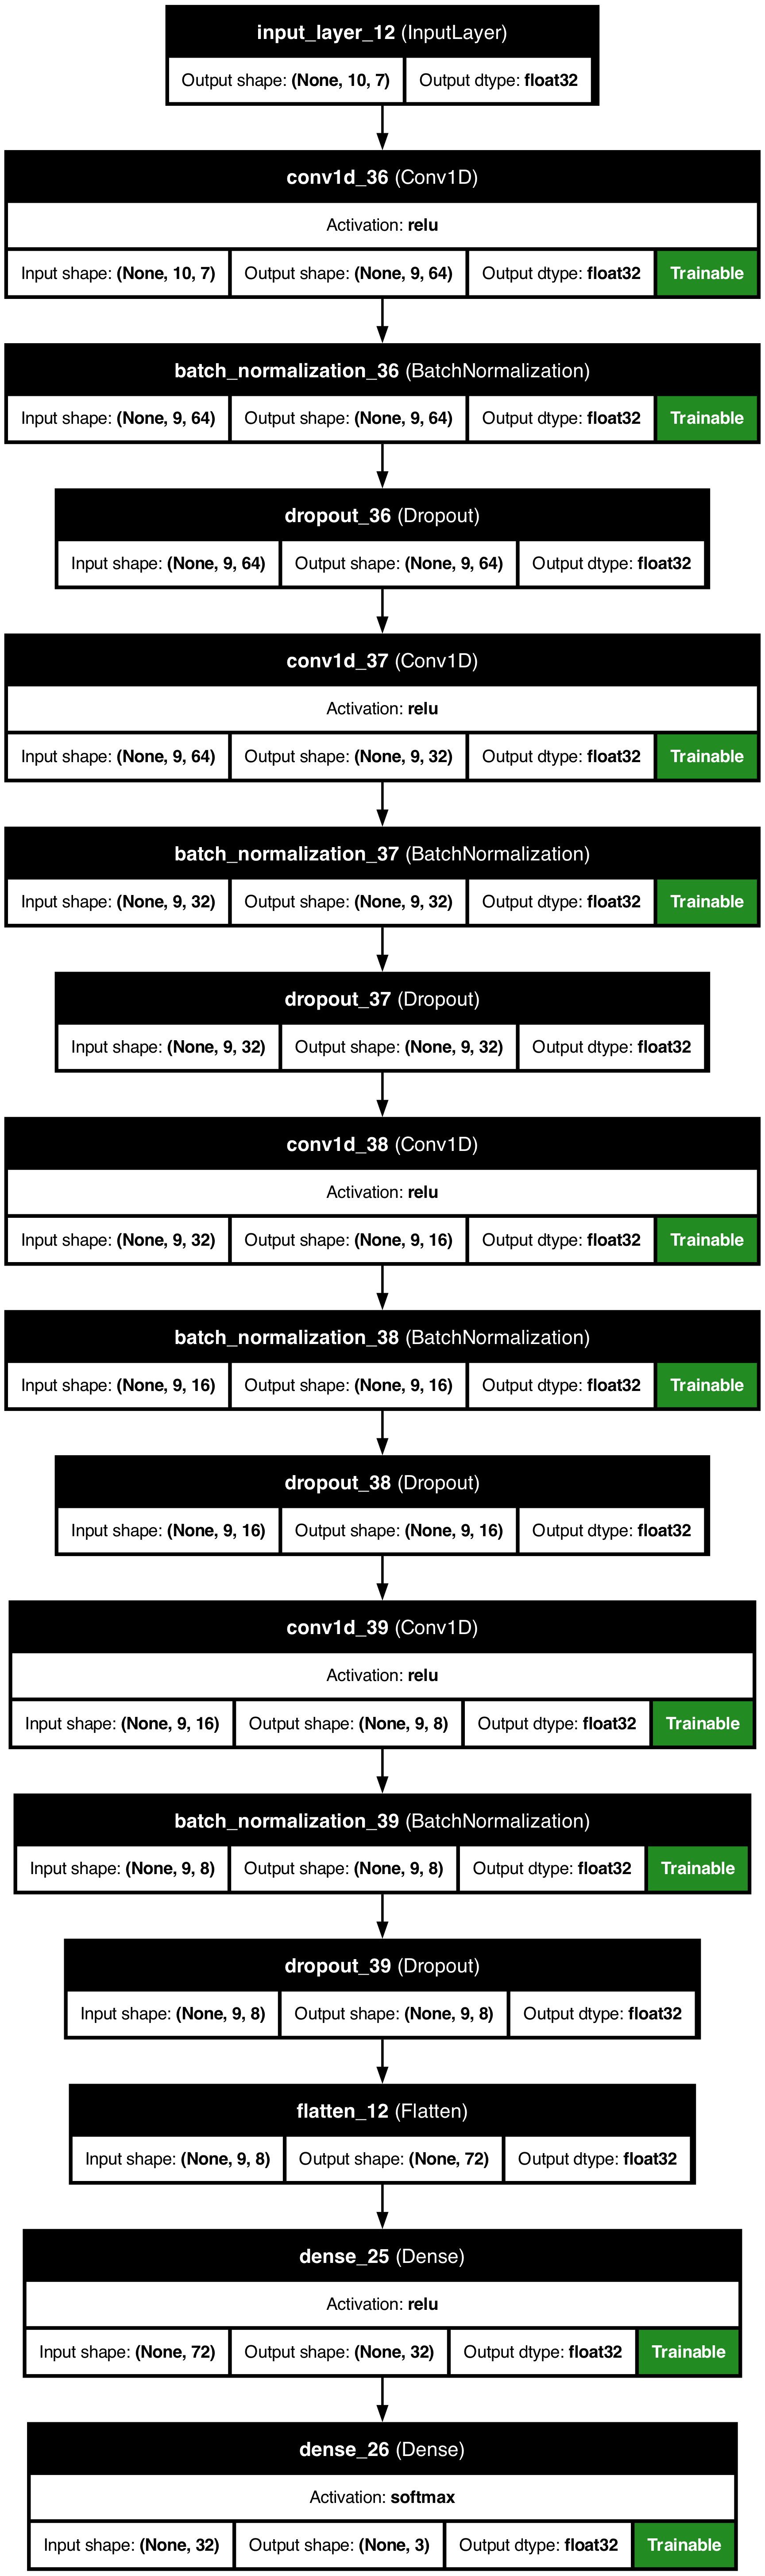

In [242]:
# modeling

from tensorflow.keras.layers import Conv1D, Dropout, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.models import Model

input_layer = Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2]))

'''
    점점 kernel size를 늘려나가서 feature extraction을 효과적으로 할 수 있도록 구성하였다.
    dense layer를 여기서 더 추가하면 overfitting이 일어나서, 여기서 멈춘다.
'''

# block 1
conv1 = Conv1D(filters=64, kernel_size=2, activation='relu')(input_layer)
batch_norm1 = BatchNormalization()(conv1)
dropout1 = Dropout(0.6)(batch_norm1)

# block 2
conv2 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(dropout1)
batch_norm2 = BatchNormalization()(conv2)
dropout2 = Dropout(0.5)(batch_norm2)

# block 3
conv3 = Conv1D(filters=16, kernel_size=4, activation='relu', padding='same')(dropout2)
batch_norm3 = BatchNormalization()(conv3)
dropout3 = Dropout(0.5)(batch_norm3)

# block 4
conv4 = Conv1D(filters=8, kernel_size=4, activation='relu', padding='same')(dropout3)
batch_norm4 = BatchNormalization()(conv4)
dropout4 = Dropout(0.5)(batch_norm4)

# flatten
flat = Flatten()(dropout4)

# dense layers
dense1 = Dense(32, activation='relu')(flat)
output_layer = Dense(3, activation='softmax')(dense1)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()
keras.utils.plot_model(model, 
                       show_shapes=True, 
                       show_layer_activations=True, 
                       show_dtype=True, 
                       show_layer_names=True, 
                       show_trainable=True)

In [243]:
# compile

optimizer = keras.optimizers.Adam()
model.compile (optimizer=optimizer, 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

In [244]:
# fit

# early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, 
#                                                 restore_best_weights=True)

from memory_profiler import profile

@profile # 메모리 오버플로우로 인한 시스템 다운을 막기 위해서
def train_model(model, X_train_seq, y_train_seq) :
#     early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    
    history = model.fit(X_train_seq, y_train_seq, epochs=60, 
                        validation_split=0.2,
                        batch_size=16,
#                         callbacks=[early_stopping_cb], 
                        verbose=True, shuffle=True)
    
    return history

input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])  # (n_steps, 특징 수)
history = train_model(model, X_train_seq, y_train_seq)

ERROR: Could not find file /var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_49377/291636803.py
Epoch 1/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.3885 - loss: 1.3471 - val_accuracy: 0.5403 - val_loss: 0.9380
Epoch 2/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6370 - loss: 0.8306 - val_accuracy: 0.7465 - val_loss: 0.5871
Epoch 3/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7387 - loss: 0.6540 - val_accuracy: 0.8203 - val_loss: 0.4827
Epoch 4/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7731 - loss: 0.5995 - val_accuracy: 0.8410 - val_loss: 0.4436
Epoch 5/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7605 - loss: 0.5833 - val_accuracy: 0.8479 - val_loss: 0.4351
Epoch 6/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7956 - loss: 0.5420 - val_accuracy: 0.8387 - val_loss: 0.4191
Epoch 7/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7959 - loss: 0.5392 - val_accuracy: 0.8445 - val_loss

217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8312 - loss: 0.4072 - val_accuracy: 0.8594 - val_loss: 0.3447
Epoch 51/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8226 - loss: 0.4117 - val_accuracy: 0.8583 - val_loss: 0.3451
Epoch 52/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8315 - loss: 0.4160 - val_accuracy: 0.8502 - val_loss: 0.3660
Epoch 53/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8353 - loss: 0.4204 - val_accuracy: 0.8664 - val_loss: 0.3462
Epoch 54/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8240 - loss: 0.4342 - val_accuracy: 0.8422 - val_loss: 0.4101
Epoch 55/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8365 - loss: 0.4159 - val_accuracy: 0.8594 - val_loss: 0.3318
Epoch 56/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8350 - loss: 0.4121 - val_accuracy: 0.8744 - val_loss: 0.3272
Epoch 57/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8415 - loss: 0.3895 - val_accuracy

{'accuracy': [0.4584774971008301, 0.6750288605690002, 0.7373125553131104, 0.7733563780784607, 0.7776816487312317, 0.7883506417274475, 0.7871972322463989, 0.7961360812187195, 0.802191436290741, 0.8059400320053101, 0.803056538105011, 0.8070934414863586, 0.8094002604484558, 0.8073817491531372, 0.818050742149353, 0.8088235259056091, 0.8134371638298035, 0.822376012802124, 0.8177623748779297, 0.8171856999397278, 0.8114187121391296, 0.8140138387680054, 0.8163206577301025, 0.8154556155204773, 0.823817789554596, 0.8036332130432129, 0.8105536103248596, 0.8336216807365417, 0.8217992782592773, 0.8281430006027222, 0.8145905137062073, 0.8278546929359436, 0.8220876455307007, 0.819492518901825, 0.8295847773551941, 0.8197808265686035, 0.8316032290458679, 0.8200691938400269, 0.826701283454895, 0.8272779583930969, 0.8278546929359436, 0.8287197351455688, 0.8313148617744446, 0.8321799039840698, 0.8290081024169922, 0.8304498195648193, 0.8350634574890137, 0.830161452293396, 0.8217992782592773, 0.828143000602

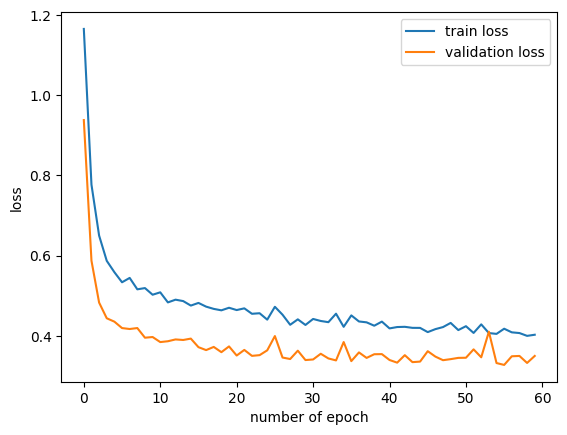

In [245]:
# history 그리고 loss 시각화

print (history.history)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.legend (['train loss', 'validation loss'])
plt.show() 

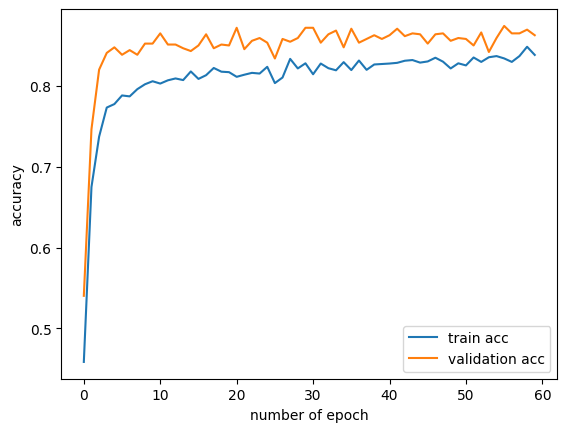

In [246]:
# acc 시각화

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('number of epoch')
plt.ylabel('accuracy')
plt.legend (['train acc', 'validation acc'])
plt.show()

In [248]:
# classification report, confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

y_test_pred = model.predict(X_test_seq)
print(y_test_pred)

y_test_pred_classes = np.argmax(y_test_pred, axis=1)

if len(y_test_seq.shape) > 1 :  # multilabel-indicator인 경우
    y_test_seq_classes = np.argmax(y_test_seq, axis=1)
else :
    y_test_seq_classes = y_test_seq

cm_test = confusion_matrix(y_test_seq_classes, y_test_pred_classes)
print("- test data confusion matrix -\n")
print(cm_test)

print('\n --------------- \n')

cr_test = classification_report(y_test_seq_classes, y_test_pred_classes)
print("- test data report of classification -\n")
print(cr_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[5.40112317e-01 3.40337873e-01 1.19549796e-01]
 [9.20045614e-01 6.35337159e-02 1.64205786e-02]
 [1.21441223e-01 4.54281032e-01 4.24277753e-01]
 ...
 [9.41936392e-03 1.70771986e-01 8.19808602e-01]
 [9.62164283e-01 3.19169089e-02 5.91885857e-03]
 [9.93037164e-01 6.47011865e-03 4.92668245e-04]]
- test data confusion matrix -

[[279  50   9]
 [ 27 309  40]
 [  1  36 334]]

 --------------- 

- test data report of classification -

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       338
           1       0.78      0.82      0.80       376
           2       0.87      0.90      0.89       371

    accuracy                           0.85      1085
   macro avg       0.85      0.85      0.85      1085
weighted avg       0.85      0.85      0.85      1085



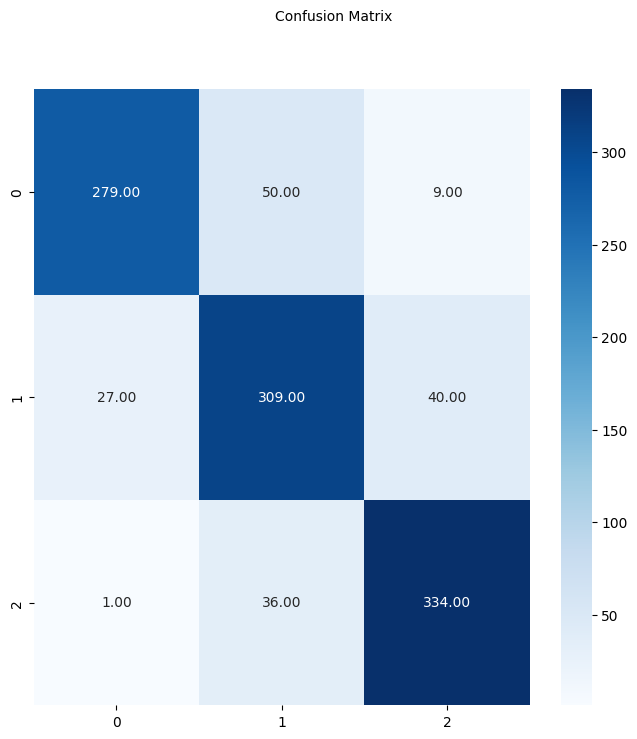

In [249]:
# seaborn으로 confusion matrix 시각화

fig, axes = plt.subplots(figsize=(8, 8))

# heatmap
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='.2f')

fig.suptitle('Confusion Matrix\n\n', fontsize=10)
plt.show()

In [251]:
# evaluate

eval_1 = model.evaluate(X_test_seq, y_test_seq)
print (eval_1)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8448 - loss: 0.3829
[0.35885876417160034, 0.8497695922851562]


------


### 3. LSTM-DNN

<img src="https://user-images.githubusercontent.com/45377884/88295143-fe34f400-cd37-11ea-8ef5-4a5c941718eb.png" width=500px>

- 위 figure처럼 LSTM 부분에서는 feature extraction을 진행하고, DNN (fully connected layer)에서는 extracted된 특성 정보를 가지고 분류 및 회귀를 수행한다. 

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 10, 7)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 10, 16)         │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 10, 16)         │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 10, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 16)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,899 (19.14 KB)

 Trainable params: 4,835 (18.89 KB)

 Non-trainable params: 64 (256.00 B)

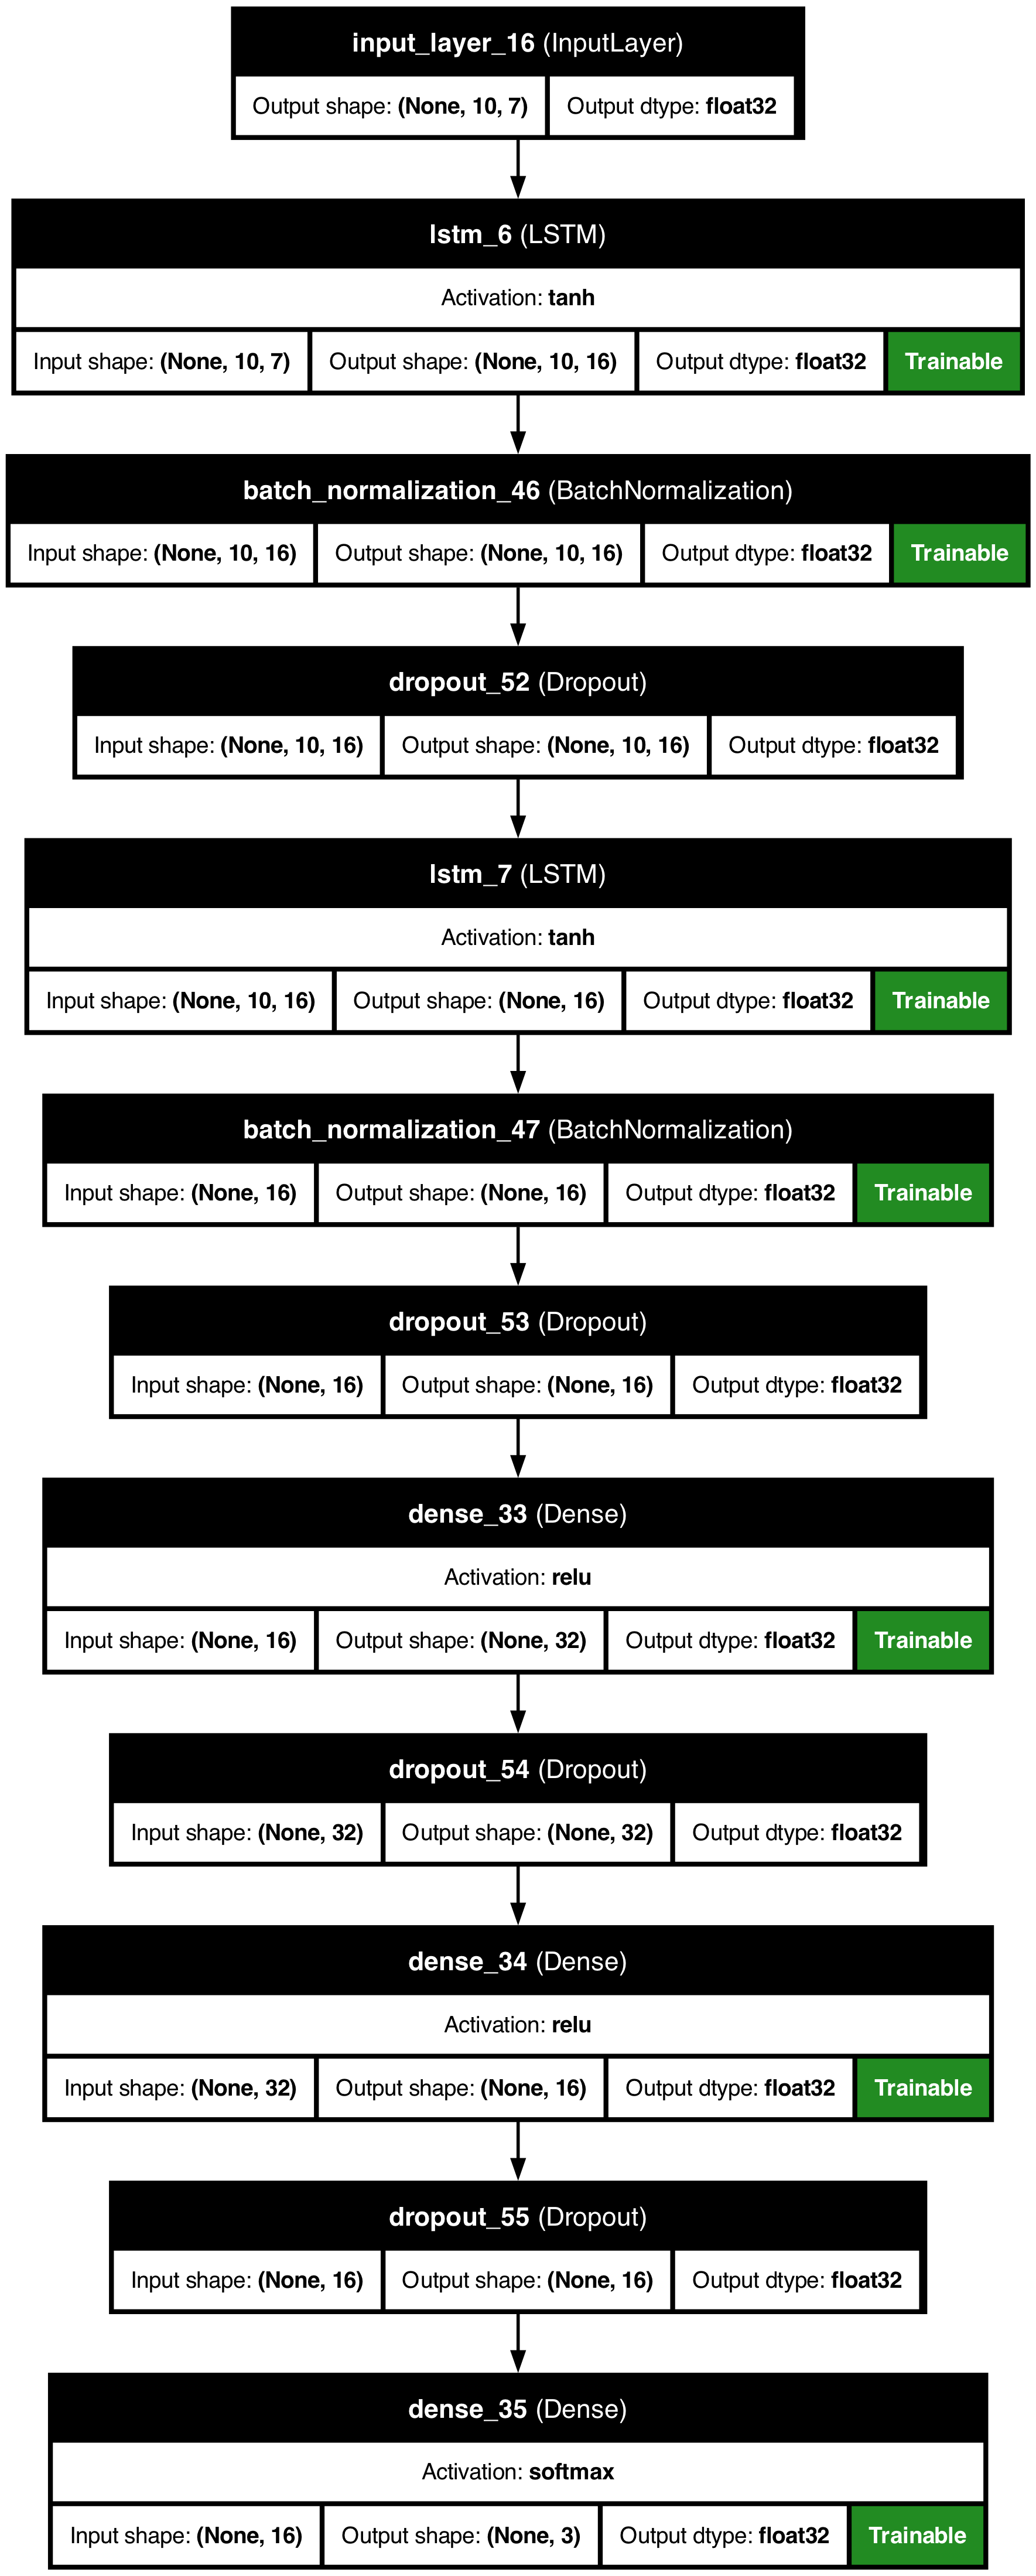

In [255]:
# modeling

from tensorflow.keras import regularizers

# Input layer
input_layer = keras.Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2]))

'''
    계속적으로 val_loss가 늘어나는 현상 발견
    regularizer를 추가하여 l2 규제를 하게끔 함
    l1 규제 : 절댓값 규제 (특정 feature을 0으로 만들 수 있음)
    l2 규제 : 제곱 규제 (특정 feature을 0과 가깝게 만들 수 있음)
'''

# 첫 번째 LSTM 레이어 + BatchNormalization + Dropout
lstm_1 = keras.layers.LSTM(16, kernel_regularizer=regularizers.l2(0.01), 
                           return_sequences=True)(input_layer)
batch_1 = keras.layers.BatchNormalization()(lstm_1)
dropout_1 = keras.layers.Dropout(0.2)(batch_1)

# 두 번째 LSTM 레이어 + BatchNormalization + Dropout
lstm_2 = keras.layers.LSTM(16, kernel_regularizer=regularizers.l2(0.01), 
                           return_sequences=False)(dropout_1)
batch_2 = keras.layers.BatchNormalization()(lstm_2)
dropout_2 = keras.layers.Dropout(0.2)(batch_2)

# Dense 레이어 + Dropout
dense_1 = keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(dropout_2)
dropout_3 = keras.layers.Dropout(0.2)(dense_1)

dense_2 = keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))(dropout_3)
dropout_4 = keras.layers.Dropout(0.2)(dense_2)

# Output layer
output_layer = keras.layers.Dense(3, activation='softmax')(dropout_4)

# Model definition
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Model summary
model.summary()

# Plot model
keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True,
                      show_dtype=True,
                      show_layer_names=True,
                      show_trainable=True)


In [256]:
# compile

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile (optimizer=optimizer, 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

In [259]:
# fit

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# EarlyStopping 및 ReduceLROnPlateau 추가함 (val_loss가 계속 상승하고 있어서 조치 취하기 위함)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

from memory_profiler import profile

@profile # 메모리 오버플로우로 인한 시스템 다운을 막기 위해서
def train_model() :
    history = model.fit(X_train_seq, y_train_seq, epochs=60, 
                        validation_split=0.2,
                       callbacks=[early_stopping, reduce_lr],
                        verbose=True)
    
    return history
    
history = train_model()
print (history)

ERROR: Could not find file /var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_49377/3872882423.py
Epoch 1/60
109/109 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5418 - loss: 1.7393 - val_accuracy: 0.6394 - val_loss: 1.5510 - learning_rate: 0.0010
Epoch 2/60
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7866 - loss: 1.1866 - val_accuracy: 0.7650 - val_loss: 1.1751 - learning_rate: 0.0010
Epoch 3/60
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8039 - loss: 0.9803 - val_accuracy: 0.8168 - val_loss: 0.8669 - learning_rate: 0.0010
Epoch 4/60
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8199 - loss: 0.8422 - val_accuracy: 0.8583 - val_loss: 0.7241 - learning_rate: 0.0010
Epoch 5/60
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8380 - loss: 0.7404 - val_accuracy: 0.8456 - val_loss: 0.6692 - learning_rate: 0.0010
Epoch 6/60
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8328 - loss: 0.7010 - val_accuracy: 0.8306 - val_loss: 0.6387 - le

Epoch 44/60
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8528 - loss: 0.4238 - val_accuracy: 0.8652 - val_loss: 0.3986 - learning_rate: 1.0000e-04


{'accuracy': [0.6476355195045471, 0.7920991778373718, 0.8073817491531372, 0.8160322904586792, 0.8290081024169922, 0.8318915963172913, 0.8339100480079651, 0.8399654030799866, 0.8353517651557922, 0.8382353186607361, 0.8350634574890137, 0.8425605297088623, 0.8365051746368408, 0.8419838547706604, 0.8448673486709595, 0.84659743309021, 0.8434256315231323, 0.843137264251709, 0.8376585841178894, 0.8437139391899109, 0.8419838547706604, 0.8445789813995361, 0.8434256315231323, 0.8538062572479248, 0.8428488969802856, 0.8451557159423828, 0.8500576615333557, 0.8440023064613342, 0.85467129945755, 0.8543829321861267, 0.85467129945755, 0.850346028804779, 0.8592848777770996, 0.855247974395752, 0.8578431606292725, 0.8520761132240295, 0.8566897511482239, 0.855247974395752, 0.8543829321861267, 0.8486159443855286, 0.8587082028388977, 0.8506343960762024, 0.8483275771141052, 0.85467129945755], 'loss': [1.5365016460418701, 1.1302868127822876, 0.9446107745170593, 0.8331125378608704, 0.7417208552360535, 0.687229

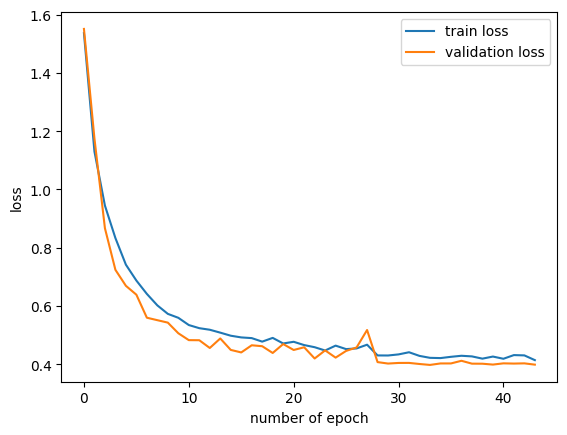

In [260]:
# history 그리고 loss 시각화

print (history.history)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.legend (['train loss', 'validation loss'])
plt.show() 

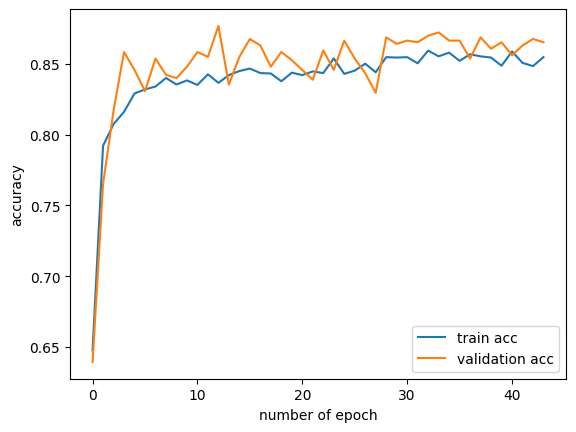

In [261]:
# acc 시각화

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('number of epoch')
plt.ylabel('accuracy')
plt.legend (['train acc', 'validation acc'])
plt.show()

In [263]:
# classification report, confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

y_test_pred = model.predict(X_test_seq)
print(y_test_pred)

y_test_pred_classes = np.argmax(y_test_pred, axis=1)

if len(y_test_seq.shape) > 1 :  # multilabel-indicator인 경우
    y_test_seq_classes = np.argmax(y_test_seq, axis=1)
else :
    y_test_seq_classes = y_test_seq

cm_test = confusion_matrix(y_test_seq_classes, y_test_pred_classes)
print("- test data confusion matrix -\n")
print(cm_test)

print('\n --------------- \n')

cr_test = classification_report(y_test_seq_classes, y_test_pred_classes)
print("- test data report of classification -\n")
print(cr_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[8.06646585e-01 1.49434566e-01 4.39187661e-02]
 [9.73987997e-01 2.38987822e-02 2.11316906e-03]
 [3.04043859e-01 4.18118477e-01 2.77837694e-01]
 ...
 [6.04615780e-03 9.30471644e-02 9.00906682e-01]
 [9.86825407e-01 1.25474045e-02 6.27281086e-04]
 [9.93537843e-01 6.27088966e-03 1.91315179e-04]]
- test data confusion matrix -

[[289  41   8]
 [ 35 297  44]
 [  4  23 344]]

 --------------- 

- test data report of classification -

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       338
           1       0.82      0.79      0.81       376
           2       0.87      0.93      0.90       371

    accuracy                           0.86      1085
   macro avg       0.86      0.86      0.86      1085
weighted avg       0.86      0.86      0.86      1085



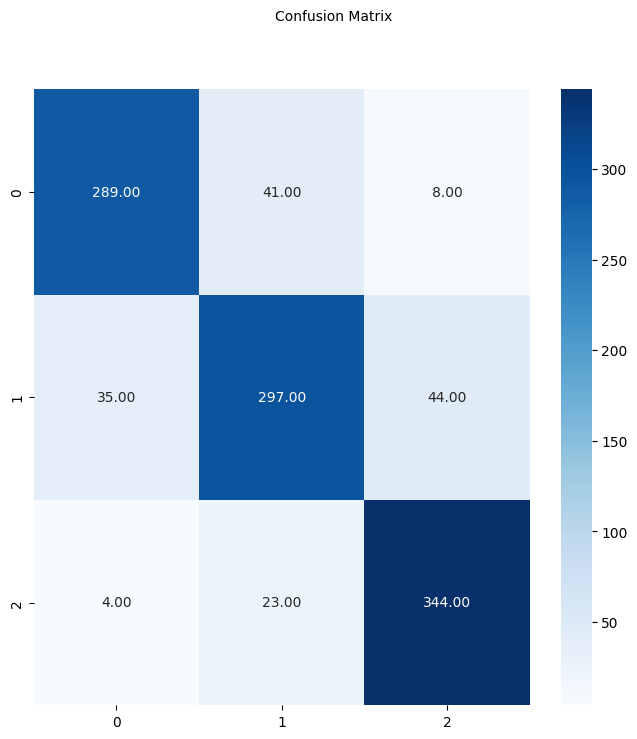

In [264]:
# seaborn으로 confusion matrix 시각화

fig, axes = plt.subplots(figsize=(8, 8))

# heatmap
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='.2f')

fig.suptitle('Confusion Matrix\n\n', fontsize=10)
plt.show()

In [266]:
# evaluate

eval_2 = model.evaluate(X_test_seq, y_test_seq)
print (eval_2)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8504 - loss: 0.4250
[0.3936573565006256, 0.8571428656578064]


------


### 4. CNN-LSTM convergence

<img src="https://www.researchgate.net/publication/343341551/figure/fig4/AS:919348650704897@1596201207194/Architecture-of-the-Hybrid-1D-CNN-LSTM-model-for-human-activity-recognition.pngg" width=500px>

- **Reference**
    - https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FArchitecture-of-the-Hybrid-1D-CNN-LSTM-model-for-human-activity-recognition_fig4_343341551&psig=AOvVaw3H4z-wEtr3Asr2SOEydWi3&ust=1727104308517000&source=images&cd=vfe&opi=89978449&ved=0CBcQjhxqFwoTCMDRk4fr1ogDFQAAAAAdAAAAABAJ
    - https://www.researchgate.net/figure/The-proposed-CNN-LSTM-model-architecture_fig5_356018554
    
CNN과 LSTM을 결합하여 사용한다. CNN으로 먼저 feature extraction을 진행한 후, LSTM으로 장기 기억 track을 하나 더 두어 순환형 데이터에 맞는 학습을 진행할 것이다. 이렇게 학습 시 이점은 아래와 같다고 생각된다.

- 맨 처음에 복잡도를 줄이면 찾아오는 이점
    - 먼저 CNN으로 입력 복잡성을 줄이면 LSTM이 고차원 데이터에 압도되지 않고 순차적 패턴 학습에 집중 가능하다
    - 장기적인 맥락을 유지하고 정보를 오랫동안 기억할 수 있을 것이다.
- CNN-LSTM architecture을 이용하면 영상 분석 및 시계열 분류와 같은 공간적 및 시간적 동력이 주가 되는 training에서 이점을 가져올 것이다. **(예시 : https://github.com/lky473736/learning-AI/blob/main/report/EMG/EDA_CNN-LSTM_classification_EMG.ipynb)**

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_42 (Conv1D)              │ (None, 8, 32)          │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_43 (Conv1D)              │ (None, 5, 64)          │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 5, 64)          │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,667 (84.64 KB)

 Trainable params: 21,667 (84.64 KB)

 Non-trainable params: 0 (0.00 B)

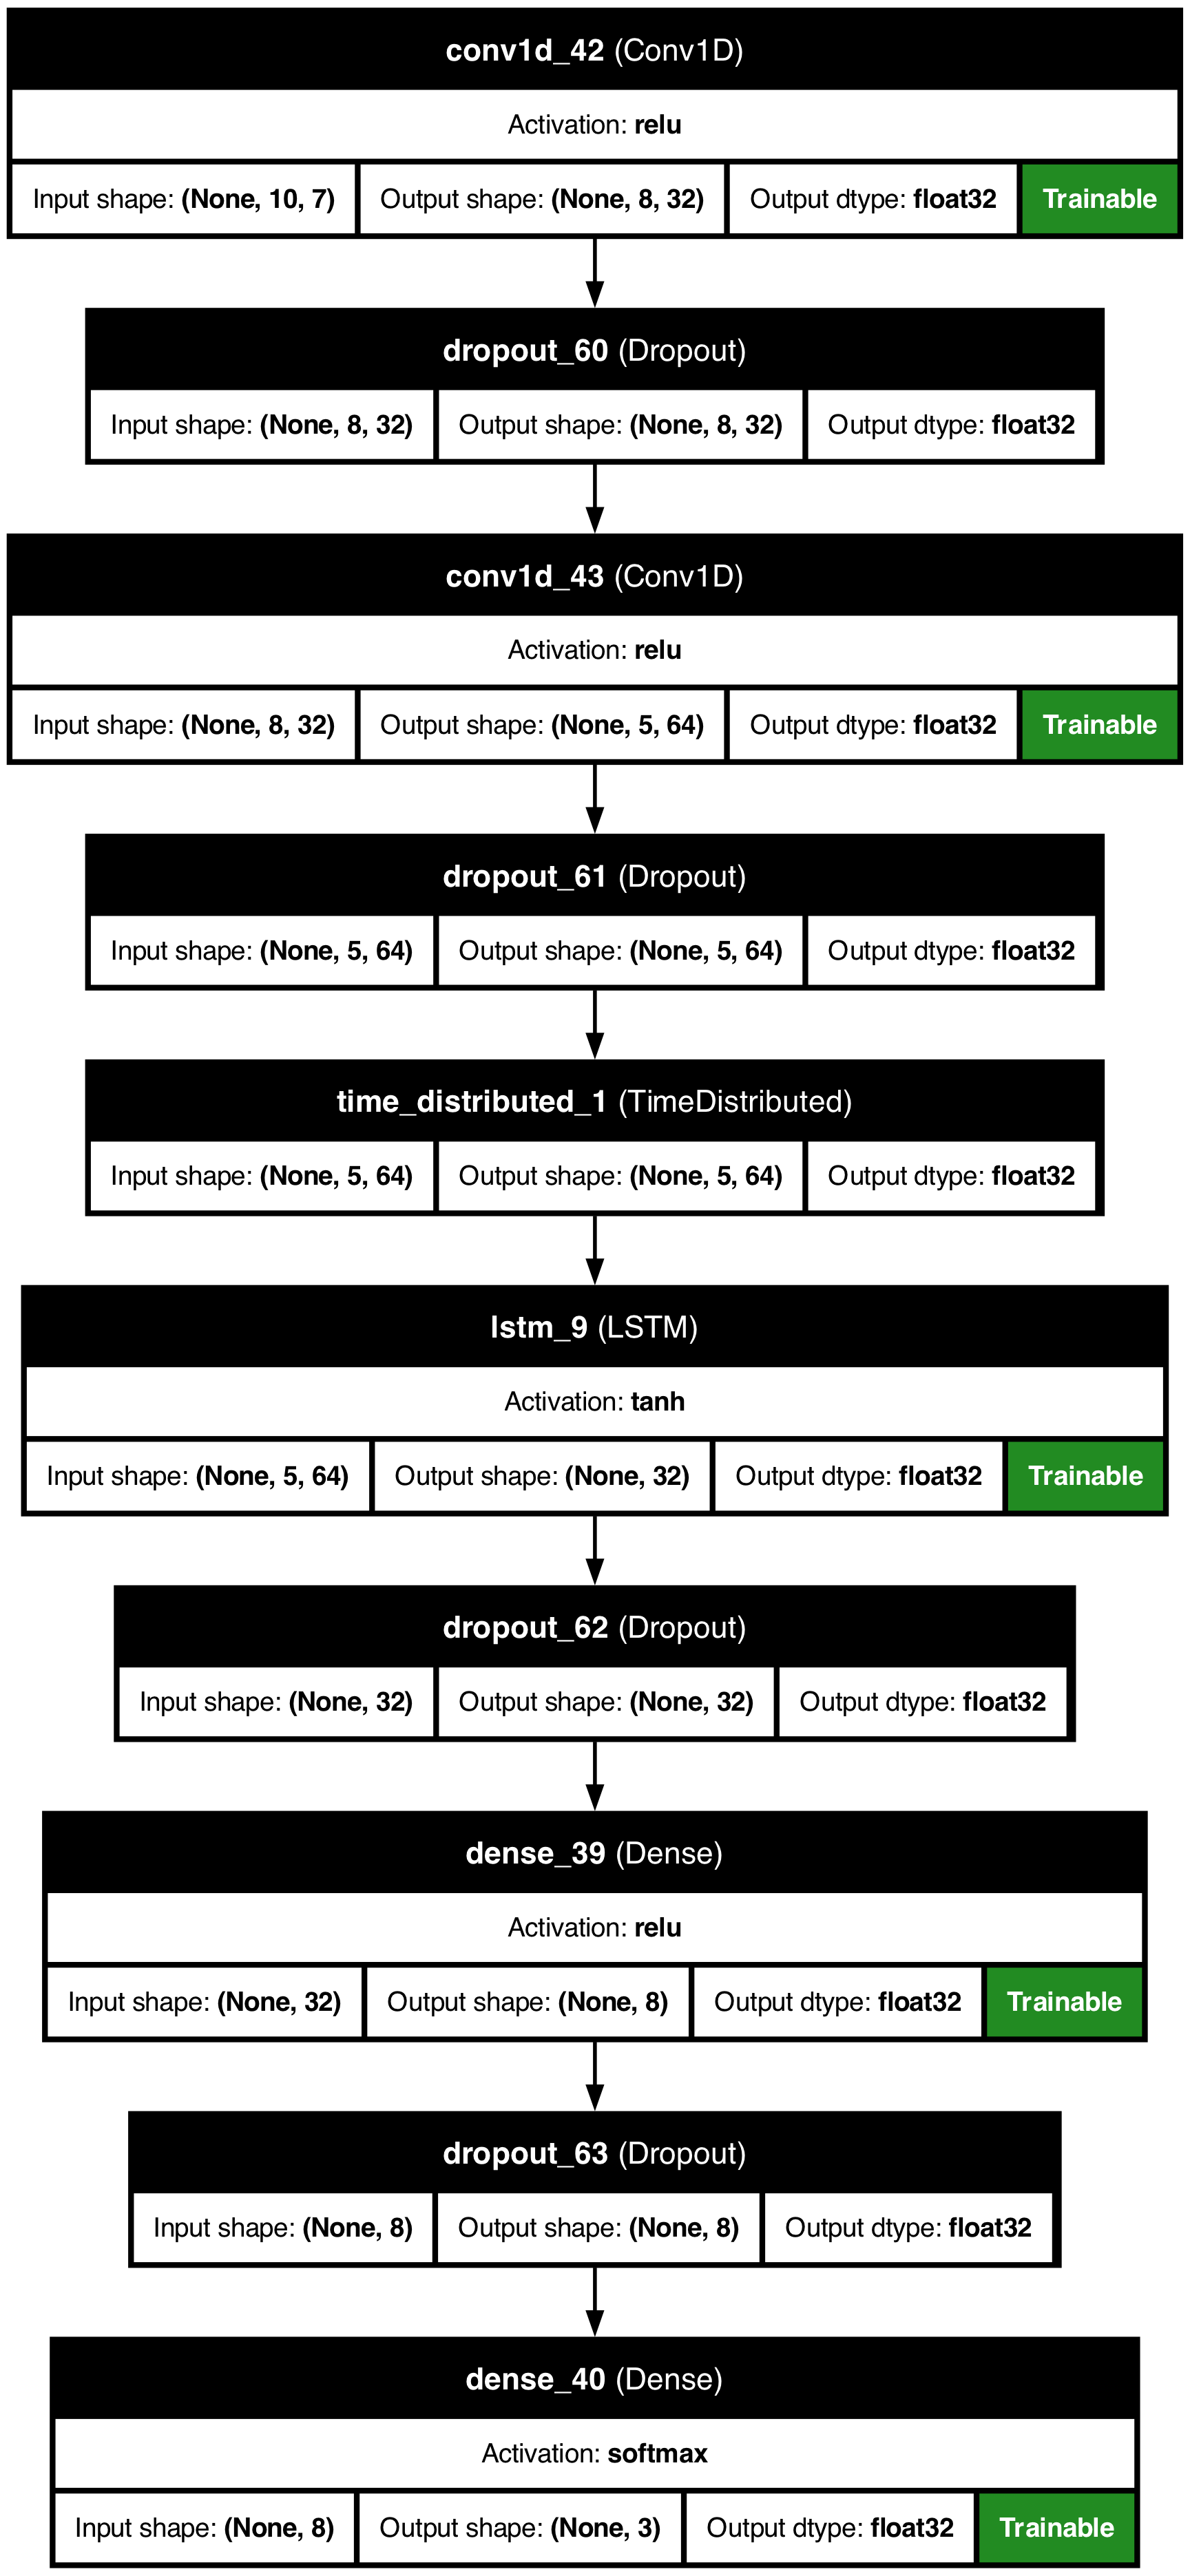

In [271]:
# modeling

from tensorflow.keras import models, layers

def create_model(input_shape, num_classes) :
    model = models.Sequential()

    # Spatial Feature Extractor
    model.add(layers.Conv1D(filters=32, kernel_size=3, 
                            activation='relu', input_shape=input_shape))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Conv1D(filters=64, 
                            kernel_size=4, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Apply TimeDistributed on the LSTM layers
    model.add(layers.TimeDistributed(layers.Flatten()))  

    # Temporal Feature Extractor (LSTM)
    model.add(layers.LSTM(32, return_sequences=False))
    model.add(layers.Dropout(0.2))

    # Fully Connected Layer
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

model = create_model(input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), num_classes=3)

model.summary()
tf.keras.utils.plot_model(model,
                           show_dtype=True,
                           show_layer_activations=True,
                           show_layer_names=True,
                           show_shapes=True,
                           show_trainable=True)

In [272]:
# compile

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile (optimizer=optimizer, 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

In [273]:
# fit

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# EarlyStopping 및 ReduceLROnPlateau 추가함 (val_loss가 계속 상승하고 있어서 조치 취하기 위함)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

from memory_profiler import profile

@profile # 메모리 오버플로우로 인한 시스템 다운을 막기 위해서
def train_model() :
    history = model.fit(X_train_seq, y_train_seq, epochs=60, 
                        validation_split=0.2,
                       callbacks=[early_stopping, reduce_lr],
                        verbose=True)
    
    return history
    
history = train_model()
print (history)

ERROR: Could not find file /var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_49377/3872882423.py
Epoch 1/60
109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3629 - loss: 1.0863 - val_accuracy: 0.4896 - val_loss: 1.0216 - learning_rate: 1.0000e-04
Epoch 2/60
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4786 - loss: 1.0077 - val_accuracy: 0.5092 - val_loss: 0.9949 - learning_rate: 1.0000e-04
Epoch 3/60
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5186 - loss: 0.9875 - val_accuracy: 0.6325 - val_loss: 0.9685 - learning_rate: 1.0000e-04
Epoch 4/60
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5505 - loss: 0.9693 - val_accuracy: 0.6647 - val_loss: 0.9397 - learning_rate: 1.0000e-04
Epoch 5/60
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5897 - loss: 0.9292 - val_accuracy: 0.6555 - val_loss: 0.8931 - learning_rate: 1.0000e-04
Epoch 6/60
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6399 - loss: 0.9025 - val_accuracy: 0.7131

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7632 - loss: 0.5268 - val_accuracy: 0.8502 - val_loss: 0.4085 - learning_rate: 1.0000e-04
Epoch 44/60
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8174 - loss: 0.4989 - val_accuracy: 0.8514 - val_loss: 0.4039 - learning_rate: 1.0000e-04
Epoch 45/60
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8148 - loss: 0.4951 - val_accuracy: 0.8468 - val_loss: 0.4046 - learning_rate: 1.0000e-04
Epoch 46/60
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8269 - loss: 0.4888 - val_accuracy: 0.8525 - val_loss: 0.4038 - learning_rate: 1.0000e-04
Epoch 47/60
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8172 - loss: 0.5134 - val_accuracy: 0.8548 - val_loss: 0.4050 - learning_rate: 1.0000e-04
Epoch 48/60
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8184 - loss: 0.5016 - val_accuracy: 0.8525 - val_loss: 0.4023 - learning_rate: 1.0000e-04
Epoch 49/60
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy

{'accuracy': [0.3863898515701294, 0.48558247089385986, 0.5242214798927307, 0.568050742149353, 0.5940023064613342, 0.6329296231269836, 0.6580161452293396, 0.6828143000602722, 0.6807958483695984, 0.7107843160629272, 0.7252018451690674, 0.7459630966186523, 0.7257785201072693, 0.7234717607498169, 0.7301037907600403, 0.7329872846603394, 0.7373125553131104, 0.7364475131034851, 0.7367358803749084, 0.7298154830932617, 0.7321222424507141, 0.7430796027183533, 0.7549019455909729, 0.7442330121994019, 0.7401960492134094, 0.7675893902778625, 0.7572087645530701, 0.7540369033813477, 0.7606689929962158, 0.7563437223434448, 0.762110710144043, 0.7572087645530701, 0.7546136379241943, 0.7572087645530701, 0.758650541305542, 0.7722030282020569, 0.7762399315834045, 0.764994204044342, 0.769319474697113, 0.7722030282020569, 0.7678777575492859, 0.7762399315834045, 0.7742214798927307, 0.8160322904586792, 0.8140138387680054, 0.8171856999397278, 0.8183391094207764, 0.8220876455307007, 0.8166090250015259, 0.82295268

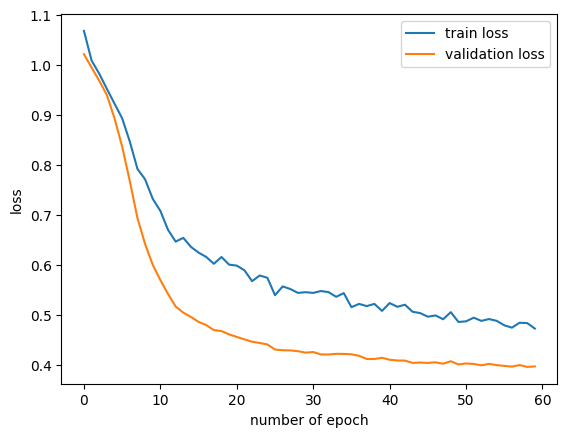

In [274]:
# history 그리고 loss 시각화

print (history.history)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.legend (['train loss', 'validation loss'])
plt.show() 

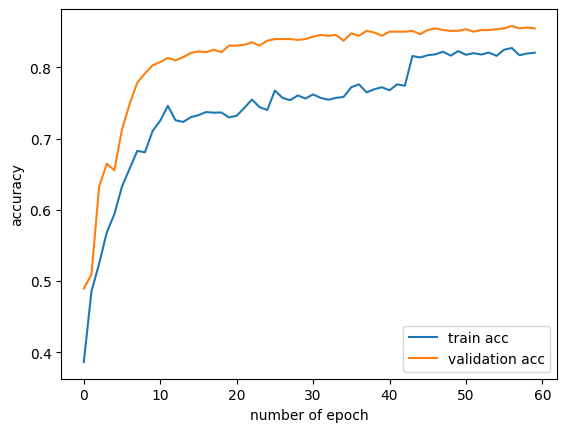

In [275]:
# acc 시각화

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('number of epoch')
plt.ylabel('accuracy')
plt.legend (['train acc', 'validation acc'])
plt.show()

In [277]:
# classification report, confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

y_test_pred = model.predict(X_test_seq)
print(y_test_pred)

y_test_pred_classes = np.argmax(y_test_pred, axis=1)

if len(y_test_seq.shape) > 1 :  # multilabel-indicator인 경우
    y_test_seq_classes = np.argmax(y_test_seq, axis=1)
else :
    y_test_seq_classes = y_test_seq

cm_test = confusion_matrix(y_test_seq_classes, y_test_pred_classes)
print("- test data confusion matrix -\n")
print(cm_test)

print('\n --------------- \n')

cr_test = classification_report(y_test_seq_classes, y_test_pred_classes)
print("- test data report of classification -\n")
print(cr_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[9.8914212e-01 1.0308787e-02 5.4898515e-04]
 [9.9050659e-01 9.0511059e-03 4.4228308e-04]
 [9.0986788e-01 7.6536819e-02 1.3595263e-02]
 ...
 [1.2410592e-02 5.3333588e-02 9.3425578e-01]
 [9.8196238e-01 1.7070010e-02 9.6761319e-04]
 [9.9436015e-01 5.5388617e-03 1.0101750e-04]]
- test data confusion matrix -

[[299  24  15]
 [ 42 280  54]
 [ 10  17 344]]

 --------------- 

- test data report of classification -

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       338
           1       0.87      0.74      0.80       376
           2       0.83      0.93      0.88       371

    accuracy                           0.85      1085
   macro avg       0.85      0.85      0.85      1085
weighted avg       0.85      0.85      0.85      1085



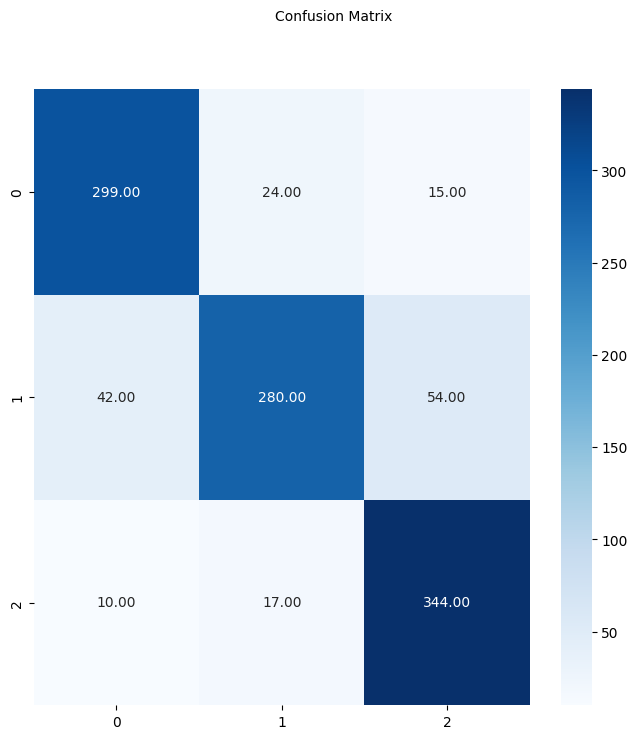

In [278]:
# seaborn으로 confusion matrix 시각화

fig, axes = plt.subplots(figsize=(8, 8))

# heatmap
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='.2f')

fig.suptitle('Confusion Matrix\n\n', fontsize=10)
plt.show()

In [279]:
# evaluate

eval_3 = model.evaluate(X_test_seq, y_test_seq)
print (eval_3)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8500 - loss: 0.4020 
[0.38316285610198975, 0.8506912589073181]


--------



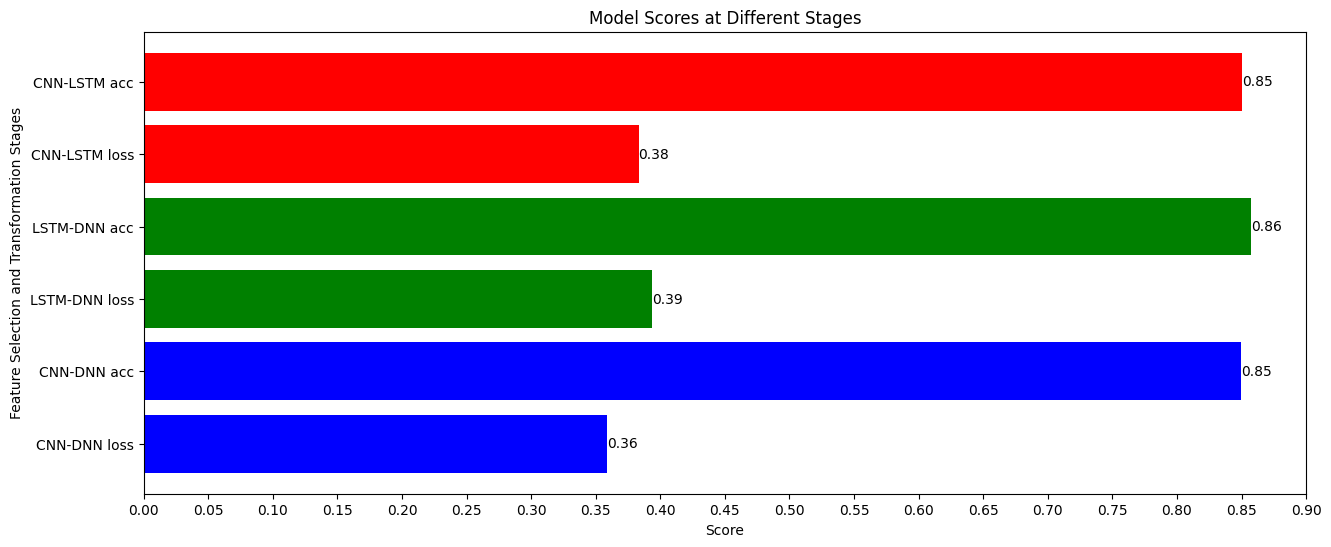

In [284]:
'''
    종합적으로 보기 위해 loss와 accuracy를 막대 그래프로 나타냄
'''

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

labels = [
    'CNN-DNN loss',
    'CNN-DNN acc',
    'LSTM-DNN loss',
    'LSTM-DNN acc',
    'CNN-LSTM loss',
    'CNN-LSTM acc',
]

=score1 = eval_1
score2 = eval_2
score3 = eval_3

scores = [score1[0], score1[1], score2[0], score2[1], score3[0], score3[1]]

plt.figure(figsize=(15, 6))
bars = plt.barh(labels, scores, color=['blue', 'blue', 'green', 'green', 'red', 'red'])

for bar in bars:
    yval = bar.get_width()
    plt.text(yval, bar.get_y() + bar.get_height()/2, f'{yval:.2f}', ha='left', va='center')

plt.xlabel('Score')
plt.ylabel('Feature Selection and Transformation Stages')
plt.title('Model Scores at Different Stages')

plt.xticks(np.arange(0, max(scores) + 0.05, 0.05))

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # 소수점 2자리로 설정

plt.show()
